In [1]:
import os
import pandas as pd
from roboflow import Roboflow
import os
import csv
import numpy as np
import pandas as pd
from PIL import Image, ExifTags
import shutil

## extract patches 

In [ ]:
# === METADATA CREATION ===

import os
import csv
import numpy as np
import pandas as pd
from PIL import Image, ExifTags
import shutil

# === CONFIGURATION ===
SEASONS_RAW_DIR     = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\October_raw"
OUTPUT_PATCH_DIR    = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\Patches"
METADATA_CSV        = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\metadata_October.csv"

PATCH_SIZE          = 128
SEASON              = "October"

# For each segment folder, a list of ROI fractions in the order of images in that folder
ROI_FRAC_LIST_PER_SEGMENT = {
    "F1": [
      (0.440, 0.647), (0.440, 0.647), (0.440, 0.647),
      (0.440, 0.647), (0.466, 0.621), (0.440, 0.621),
      (0.440, 0.621), (0.440, 0.621), (0.440, 0.621),
      (0.440, 0.621), (0.440, 0.621), (0.440, 0.621),
      (0.414, 0.673)
    ],
    "F2": [
      (0.466, 0.647), (0.466, 0.647), (0.466, 0.647),
      (0.466, 0.647), (0.440, 0.595), (0.414, 0.569),
      (0.414, 0.569), (0.414, 0.569), (0.440, 0.621),
      (0.440, 0.621)
    ],
    "F3": [
      (0.518, 0.777), (0.518, 0.777), (0.518, 0.777),
      (0.518, 0.777), (0.466, 0.725), (0.466, 0.725),
      (0.466, 0.673), (0.466, 0.647), (0.466, 0.647),
      (0.466, 0.647), (0.466, 0.647), (0.466, 0.647),
      (0.466, 0.647), (0.466, 0.699), (0.492, 0.725),
      (0.492, 0.725)
    ],
    "F8": [
      (0.414, 0.699), (0.414, 0.699), (0.414, 0.699),
      (0.414, 0.699), (0.414, 0.699)
    ],
    "F9": [
      (0.466, 0.725), (0.466, 0.725), (0.466, 0.725),
      (0.414, 0.725), (0.362, 0.673), (0.362, 0.673),
      (0.362, 0.673), (0.362, 0.673), (0.362, 0.673),
      (0.466, 0.725), (0.466, 0.725), (0.466, 0.725),
      (0.466, 0.725), (0.414, 0.725), (0.414, 0.673),
      (0.414, 0.699), (0.414, 0.699)
    ],
    "F13": [
      (0.414, 0.803), (0.414, 0.803), (0.414, 0.803),
      (0.414, 0.803), (0.414, 0.803), (0.414, 0.777),
      (0.414, 0.777), (0.414, 0.777), (0.466, 0.777),
      (0.466, 0.777), (0.518, 0.829), (0.518, 0.829),
      (0.518, 0.828), (0.466, 0.777)
    ],
    "F15": [
      (0.414, 0.725), (0.414, 0.725), (0.518, 0.725),
      (0.518, 0.725), (0.518, 0.725), (0.518, 0.725),
      (0.518, 0.725), (0.518, 0.725), (0.518, 0.725),
      (0.518, 0.725), (0.518, 0.725), (0.518, 0.777),
      (0.518, 0.777), (0.518, 0.777), (0.518, 0.725),
      (0.466, 0.725)
    ],
    "F16": [
      (0.466, 0.751), (0.518, 0.803), (0.518, 0.829), 
      (0.518, 0.829), (0.518, 0.751), (0.518, 0.777), 
      (0.492, 0.725), (0.466, 0.777), (0.492, 0.777),  
      (0.466, 0.751), (0.466, 0.751), (0.466, 0.751), 
      (0.466, 0.725), (0.466, 0.725), (0.466, 0.725), 
      (0.466, 0.725), (0.466, 0.725)
    ],
    "F17": [
      (0.518, 0.725), (0.518, 0.725), (0.518, 0.725),
      (0.518, 0.725), (0.518, 0.673), (0.466, 0.673),
      (0.466, 0.673), (0.466, 0.673), (0.440, 0.647),
      (0.440, 0.647), (0.440, 0.647), (0.414, 0.673),
      (0.440, 0.621)
    ],
    "F18": [
      (0.336, 0.621), (0.336, 0.621), (0.336, 0.621),
      (0.336, 0.621), (0.310, 0.569), (0.310, 0.569),
      (0.310, 0.569), (0.310, 0.569), (0.259, 0.518),
      (0.259, 0.518), (0.310, 0.518), (0.310, 0.518), 
      (0.310, 0.518), (0.310, 0.569)
    ],
    "F19": [
      (0.336, 0.595), (0.336, 0.595), (0.310, 0.569),
      (0.310, 0.569), (0.259, 0.569), (0.259, 0.569),
      (0.259, 0.569), (0.259, 0.621), (0.259, 0.621),
      (0.233, 0.595), (0.233, 0.595), (0.233, 0.595), 
      (0.233, 0.595), (0.233, 0.595), (0.233, 0.595),
      (0.207, 0.569), (0.155, 0.544), (0.105, 0.544), 
      (0.155, 0.544), (0.105, 0.544), (0.103, 0.492) 
    ],
    "F20": [
      (0.518, 0.880), (0.518, 0.880), (0.466, 0.880),
      (0.466, 0.829), (0.466, 0.829), (0.466, 0.829),
      (0.466, 0.829), (0.466, 0.829), (0.466, 0.829),
      (0.414, 0.880), (0.414, 0.880), (0.414, 0.880),
      (0.466, 0.880), (0.466, 0.880), (0.518, 0.829),
      (0.518, 0.829), (0.518, 0.803), (0.466, 0.803),
      (0.466, 0.880), (0.466, 0.880), (0.466, 0.829)
    ],
    "F21": [
      (0.103, 0.569), (0.103, 0.569), (0.103, 0.569),
      (0.103, 0.569), (0.103, 0.569), (0.103, 0.569),
      (0.103, 0.569), (0.103, 0.569), (0.103, 0.569),
      (0.103, 0.569), (0.103, 0.569), (0.103, 0.569), 
      (0.103, 0.569), (0.103, 0.569), (0.103, 0.569), 
      (0.103, 0.569), (0.103, 0.569)
    ],
    "F22": [
      (0.362, 0.699), (0.362, 0.699), (0.362, 0.699),
      (0.362, 0.699), (0.362, 0.699), (0.362, 0.777), 
      (0.362, 0.777), (0.362, 0.777), (0.362, 0.777), 
      (0.362, 0.777), (0.362, 0.803), (0.362, 0.803), 
      (0.414, 0.777), (0.414, 0.777), (0.362, 0.777), 
      (0.362, 0.777), (0.362, 0.777)
    ],
    "F23": [
      (0.414, 0.829), (0.414, 0.829), (0.414, 0.829),
      (0.388, 0.829), (0.388, 0.829), (0.388, 0.829),
      (0.388, 0.829), (0.388, 0.829), (0.388, 0.829),
      (0.388, 0.829), (0.388, 0.829), (0.388, 0.829),
      (0.388, 0.829), (0.388, 0.829), (0.388, 0.829),
      (0.388, 0.829), (0.388, 0.829), (0.388, 0.829),
      (0.388, 0.829), (0.388, 0.829), (0.388, 0.829),
      (0.388, 0.829), (0.388, 0.829)
    ],
    "F24": [
      (0.466, 0.725), (0.466, 0.725), (0.466, 0.725),
      (0.466, 0.725), (0.466, 0.725), (0.466, 0.725),
      (0.466, 0.725), (0.466, 0.725), (0.466, 0.725),
      (0.466, 0.673), (0.466, 0.673), (0.466, 0.673), 
      (0.466, 0.777), (0.518, 0.777), (0.518, 0.854),
      (0.518, 0.829), (0.518, 0.829)
    ]
}

os.makedirs(OUTPUT_PATCH_DIR, exist_ok=True)
for seg in ROI_FRAC_LIST_PER_SEGMENT:
    os.makedirs(os.path.join(OUTPUT_PATCH_DIR, seg), exist_ok=True)

# helpers
def to_float(r):
    try: return float(r.numerator)/r.denominator
    except: return float(r)

def dms_to_dd(dms, ref):
    d, m, s = dms
    dd = float(d) + float(m)/60 + float(s)/3600
    return -dd if ref in ("S","W") else dd

records = []

# === 1. LOOP SEGMENTS ===
for segment in sorted(os.listdir(SEASONS_RAW_DIR)):
    seg_dir = os.path.join(SEASONS_RAW_DIR, segment)
    if not os.path.isdir(seg_dir): continue

    # get the per-image ROI list for this segment
    roi_list = ROI_FRAC_LIST_PER_SEGMENT.get(segment, [])
    if not roi_list:
        raise RuntimeError(f"No ROI_FRAC_LIST defined for segment {segment}")

    # list & sort image files
    images = sorted([f for f in os.listdir(seg_dir) if f.lower().endswith(".jpg")])
    if len(images) != len(roi_list):
        raise RuntimeError(f"Image count mismatch in {segment}: {len(images)} images vs {len(roi_list)} ROI entries")

    # process each image + ROI tuple
    for idx, fname in enumerate(images):
        img_path = os.path.join(seg_dir, fname)
        x_min_frac, x_max_frac = roi_list[idx]

        # extract photo_id from DJI_..._0007_D
        base = os.path.splitext(fname)[0]
        tokens = base.split("_")              # e.g. ["DJI","20240730145602","0007","D"]
        raw_pid = tokens[-2]                  # now “0007”
        photo_id = raw_pid         # → "7"

        img = Image.open(img_path)
        W, H = img.size
        x0, x1 = int(W*x_min_frac), int(W*x_max_frac)

        # --- EXIF once per image ---
        raw_exif = img._getexif() or {}
        gps_alt = None
        exif = {}
        for tag, val in raw_exif.items():
            name = ExifTags.TAGS.get(tag, tag)
            if name=="GPSInfo":
                gps = {ExifTags.GPSTAGS.get(t,t):v for t,v in val.items()}
                if "GPSAltitude" in gps:
                    gps_alt = to_float(gps["GPSAltitude"])
                if "GPSLatitude" in gps and "GPSLatitudeRef" in gps:
                    exif["latitude"]  = dms_to_dd(gps["GPSLatitude"], gps["GPSLatitudeRef"])
                if "GPSLongitude" in gps and "GPSLongitudeRef" in gps:
                    exif["longitude"] = dms_to_dd(gps["GPSLongitude"],gps["GPSLongitudeRef"])
            if name=="FocalLength":
                exif["focal_length_mm"] = to_float(val)
            if name=="FocalLengthIn35mmFilm":
                exif["focal_length_35mm"] = to_float(val)
            if name=="FNumber":
                exif["f_number"] = to_float(val)
            if name=="ApertureValue":
                exif["aperture"] = to_float(val)

        flight_altitude = gps_alt if gps_alt is not None else np.nan

        # === 2. SLIDE PATCH WINDOW ===
        pid = 1
        for y in range(0, H, PATCH_SIZE):
            for x in range(x0, x1, PATCH_SIZE):
                if x+PATCH_SIZE>W or y+PATCH_SIZE>H:
                    continue
                patch = img.crop((x,y,x+PATCH_SIZE,y+PATCH_SIZE))
                fn = f"{segment}_{photo_id}_patch_{pid}.jpg"
                print("Saving patch with filename:", fn)    # ← this will show you each name
                out_path = os.path.join(OUTPUT_PATCH_DIR, segment, fn)
                patch.save(out_path)

                arr = np.array(patch.convert("L"))
                rec = {
                    "patch_filename": fn,
                    "season":         SEASON,
                    "segment":        segment,
                    "photo_id":       photo_id,
                    "patch_id":       pid,
                    "x_start":        x,
                    "y_start":        y,
                    "patch_size":     PATCH_SIZE,
                    "flight_altitude":flight_altitude,
                    "brightness_mean":float(arr.mean()),
                    "brightness_std": float(arr.std()),
                }
                # merge in EXIF fields if present
                rec.update({
                    "latitude":         exif.get("latitude", np.nan),
                    "longitude":        exif.get("longitude",np.nan),
                    "aperture":         exif.get("aperture", np.nan),
                    "focal_length_mm":  exif.get("focal_length_mm", np.nan),
                    "f_number":         exif.get("f_number", np.nan),
                    "focal_length_35mm":exif.get("focal_length_35mm",np.nan),
                })
                records.append(rec)
                pid += 1

# === 3. SAVE METADATA CSV ===
df = pd.DataFrame(records, columns=[
    "patch_filename","season","segment","photo_id","patch_id",
    "x_start","y_start","patch_size","flight_altitude",
    "brightness_mean","brightness_std","latitude","longitude",
    "aperture","focal_length_mm","f_number","focal_length_35mm"
])
df.to_csv(METADATA_CSV, index=False)
print(f"Saved {len(df)} ROI patches metadata to {METADATA_CSV}")

## full inference July

In [8]:
import os
import pandas as pd
from roboflow import Roboflow

# ─── 0. CONFIG ────────────────────────────────────────────────────────
METADATA_CSV = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\metadata_October.csv"
PATCH_ROOT   = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\Patches"
API_KEY      = "KaFY1Sj9E0X8PCYUldK7"
PROJECT      = "all_seasons_training"
VERSION      = 1
OUTPUT_CSV   = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\predictions_f19_to_f22.csv"

SEGMENTS_TO_RUN = ["F19","F20","F21","F22"]
# ─── 1. BUILD patch_filename → full_path map ─────────────────────────
patch_map = {}
for root, _, files in os.walk(PATCH_ROOT):
    for fn in files:
        if fn.lower().endswith((".jpg","jpeg","png")):
            patch_map[fn] = os.path.join(root, fn)

# ─── 2. LOAD full metadata (with segment) & filter to desired segments ──
df_meta_full = pd.read_csv(METADATA_CSV)

# keep only rows whose “segment” is in SEGMENTS_TO_RUN
df_meta = df_meta_full[df_meta_full["segment"].isin(SEGMENTS_TO_RUN)].reset_index(drop=True)

rf    = Roboflow(api_key=API_KEY)
model = rf.workspace().project(PROJECT).version(VERSION).model

# ─── 3. RUN PREDICTIONS ────────────────────────────────────────────────
records = []
for fn, seg in zip(df_meta["patch_filename"], df_meta["segment"]):
    full_path = patch_map.get(fn)
    if full_path is None:
        # couldn’t find that patch on disk
        records.append({"patch_filename": fn,
                        "segment": seg,
                        "pred_label": None,
                        "confidence":  None})
        continue

    response = model.predict(full_path).json().get("predictions", [])
    if response:
        top = response[0]
        records.append({
            "patch_filename": fn,
            "segment":        seg,
            "pred_label":     top["top"],
            "confidence":     top["confidence"]
        })
    else:
        records.append({
            "patch_filename": fn,
            "segment":        seg,
            "pred_label":     None,
            "confidence":     None
        })

# ─── 4. SAVE RESULTS ─────────────────────────────────────────────────
pd.DataFrame(records).to_csv(OUTPUT_CSV, index=False)
print(f"Saved {len(records)} predictions (only for {SEGMENTS_TO_RUN}) to {OUTPUT_CSV}")


loading Roboflow workspace...
loading Roboflow project...


KeyboardInterrupt: 

## inference test F1

In [ ]:
import os
import pandas as pd
from roboflow import Roboflow

# ─── 0. CONFIG ────────────────────────────────────────────────────────
METADATA_CSV = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\metadata_July.csv"
F1_PATCH_DIR = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\Patches\F9"
API_KEY      = "KaFY1Sj9E0X8PCYUldK7"
PROJECT      = "all_seasons_training"
VERSION      = 1
OUTPUT_CSV   = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\predictions_F9.csv"

# ─── 1. LOAD METADATA & FILTER TO F1 ─────────────────────────────────
df_meta = pd.read_csv(METADATA_CSV)
df_f1   = df_meta[df_meta["segment"] == "F9"][["patch_filename"]].drop_duplicates().reset_index(drop=True)

# ─── 2. BUILD patch_filename → full_path map for F1 only ─────────────
patch_map = {}
for fn in os.listdir(F1_PATCH_DIR):
    if fn.lower().endswith((".jpg","jpeg","png")):
        patch_map[fn] = os.path.join(F1_PATCH_DIR, fn)

# ─── 3. LOAD YOUR RF MODEL ───────────────────────────────────────────
rf    = Roboflow(api_key=API_KEY)
model = rf.workspace().project(PROJECT).version(VERSION).model

# ─── 4. PREDICT ─────────────────────────────────────────────────────
records = []
for fn in df_f1["patch_filename"]:
    path = patch_map.get(fn)
    if path is None:
        records.append({"patch_filename": fn, "pred_label": None, "confidence": None})
        continue

    preds = model.predict(path).json().get("predictions", [])
    if preds:
        top = preds[0]
        records.append({
            "patch_filename": fn,
            "pred_label":     top["top"],
            "confidence":     top["confidence"]
        })
    else:
        records.append({
            "patch_filename": fn,
            "pred_label":     None,
            "confidence":     None
        })

# ─── 5. SAVE ─────────────────────────────────────────────────────────
pd.DataFrame(records).to_csv(OUTPUT_CSV, index=False)
print(f"Saved {len(records)} F1 predictions to {OUTPUT_CSV}")


## local model F1

In [3]:
import os
import pandas as pd
import inference   # pip install inference

# ─── 0. CONFIG ────────────────────────────────────────────────────────────────
os.environ["ROBOFLOW_API_KEY"] = "KaFY1Sj9E0X8PCYUldK7"
MODEL_ID      = "all_seasons_training/1"
PATCH_ROOT    = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\Patches"
METADATA_CSV  = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\metadata_October.csv"
OUTPUT_CSV    = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\predictions_all_rf.csv"

# list only the segments you still need
SEGMENTS = ["F1","F2","F3","F8","F9","F13","F15","F16","F17","F18","F19","F20","F21","F22","F23","F24"]

# ─── 1. LOAD METADATA ONCE ───────────────────────────────────────────────────
df_meta = pd.read_csv(METADATA_CSV)

# ─── 2. INSTANTIATE Roboflow INFERENCE CLIENT ONCE ───────────────────────────
model = inference.get_model(MODEL_ID)

# ─── 3. RUN INFERENCE OVER ALL SEGMENTS ─────────────────────────────────────
all_records = []
for seg in SEGMENTS:
    print(f"\n▶ Processing segment {seg}…")
    patch_dir = os.path.join(PATCH_ROOT, seg)

    # build filename → full_path map
    patch_map = {
        fn: os.path.join(patch_dir, fn)
        for fn in os.listdir(patch_dir)
        if fn.lower().endswith((".jpg","jpeg","png"))
    }

    # filter metadata to this segment
    df_seg = df_meta[df_meta["segment"] == seg]
    print(f"  {len(df_seg)} patches found in metadata for {seg}")

    for fn in df_seg["patch_filename"]:
        full_path = patch_map.get(fn)
        if full_path is None:
            # missing from disk
            all_records.append({
                "segment":       seg,
                "patch_filename": fn,
                "pred_label":     None,
                "confidence":     None
            })
            continue

        resp = model.infer(image=full_path)
        # support both list‐style and object‐style responses
        preds = resp if isinstance(resp, list) else getattr(resp, "predictions", []) or []

        if preds:
            top = preds[0]
            # pull out label & confidence
            if isinstance(top, dict):
                label = top.get("class_name", top.get("top", None))
                conf  = top.get("confidence", None)
            else:
                label = getattr(top, "class_name", None) or getattr(top, "top", None)
                conf  = getattr(top, "confidence", None)
        else:
            label, conf = None, None

        all_records.append({
            "segment":        seg,
            "patch_filename": fn,
            "pred_label":     label,
            "confidence":     conf
        })

# ─── 4. SAVE EVERYTHING AT ONCE ───────────────────────────────────────────────
out_df = pd.DataFrame(all_records)
out_df.to_csv(OUTPUT_CSV, index=False)
print(f"\n✅ Saved {len(out_df)} total predictions to {OUTPUT_CSV}")


Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
Specified provider 'OpenVINOExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
Specified provider 'CoreMLExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'



▶ Processing segment F1…
  3300 patches found in metadata for F1

▶ Processing segment F2…
  2280 patches found in metadata for F2

▶ Processing segment F3…
  4590 patches found in metadata for F3

▶ Processing segment F8…
  1800 patches found in metadata for F8

▶ Processing segment F9…
  6090 patches found in metadata for F9

▶ Processing segment F13…
  6240 patches found in metadata for F13

▶ Processing segment F15…
  4800 patches found in metadata for F15

▶ Processing segment F16…
  5910 patches found in metadata for F16

▶ Processing segment F17…
  3480 patches found in metadata for F17

▶ Processing segment F18…
  4560 patches found in metadata for F18

▶ Processing segment F19…
  9210 patches found in metadata for F19

▶ Processing segment F20…
  10110 patches found in metadata for F20

▶ Processing segment F21…
  10200 patches found in metadata for F21

▶ Processing segment F22…
  8460 patches found in metadata for F22

▶ Processing segment F23…
  13020 patches found in meta

## make complete csv

### October

In [4]:
import pandas as pd

# Load the main and replacement predictions
main_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\predictions_all_rf.csv"
replacement_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\predictions_f8_to_f18.csv"

main_df = pd.read_csv(main_path)
replacement_df = pd.read_csv(replacement_path)

# Extract segments to replace
segments_to_replace = ["F8", "F9", "F13", "F15", "F16", "F17", "F18"]

# Filter rows in the main dataframe that are in the replacement segments
mask = main_df["segment"].isin(segments_to_replace)

# Replace matching rows by patch_filename
main_df.set_index("patch_filename", inplace=True)
replacement_df.set_index("patch_filename", inplace=True)

# Update pred_label and confidence from replacement_df
main_df.update(replacement_df[["pred_label", "confidence"]])

# Reset index
main_df.reset_index(inplace=True)

# Drop rows with confidence == 0
main_df = main_df[main_df["confidence"] != 0].reset_index(drop=True)

# Save updated dataframe
updated_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\predictions_all_updated.csv"
main_df.to_csv(updated_path, index=False)


### March

In [ ]:
import pandas as pd

# Load the individual prediction files
files = [
    r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_March\predictions_f1_f2_f3_f8_rf.csv",
    r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_March\predictions_f9_f13_rf.csv",
    r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_March\predictions_f15_rf.csv",
    r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_March\predictions_f16_to_f24_rf.csv"
]

# Combine them into a single DataFrame
combined_predictions = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)

# Save the combined DataFrame
output_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_March\predictions_all_combined_rf.csv"
combined_predictions.to_csv(output_path, index=False)



In [7]:
import pandas as pd

# Load the combined predictions file
combined_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_March\predictions_all_combined_rf.csv"
df_combined = pd.read_csv(combined_path)

# Remove rows with confidence = 0
df_filtered = df_combined[df_combined["confidence"] != 0]

# Save the filtered file
filtered_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_March\predictions_all_combined_rf_filtered.csv"
df_filtered.to_csv(filtered_path, index=False)

### July

In [16]:
import pandas as pd
import os

files = [
    r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\combined_predictions_single_column.csv",
    r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\predictions_all_segments_rf.csv"
]

# Combine them into a single DataFrame
combined_predictions = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)

# Save the combined DataFrame
output_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\predictions_final.csv"
combined_predictions.to_csv(output_path, index=False)


In [17]:
import pandas as pd

# Load the combined predictions file
combined_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\predictions_final.csv"
df_combined = pd.read_csv(combined_path)

# Remove rows with confidence = 0
df_filtered = df_combined[df_combined["confidence"] != 0]

# Save the filtered file
filtered_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\predictions_final_filtered.csv"
df_filtered.to_csv(filtered_path, index=False)

In [23]:
# Load the combined predictions file
combined_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\predictions_final_filtered.csv"
df_combined = pd.read_csv(combined_path)

# Remove rows where confidence is missing (NaN)
df_filtered = df_filtered[df_filtered["confidence"].notna()]
# Save the filtered file
filtered_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\predictions_final_filtered2.csv"
df_filtered.to_csv(filtered_path, index=False)

# analysis

### class distribution per season (grouped bar plot)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File paths
march_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_March\predictions_all_combined_rf_filtered.csv"
july_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\predictions_final_filtered.csv"
october_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\predictions_all_updated.csv"

# Output directory
out_dir = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Overleaf\Final_figures"
os.makedirs(out_dir, exist_ok=True)

# Load datasets
df_march = pd.read_csv(march_path)
df_july = pd.read_csv(july_path)
df_october = pd.read_csv(october_path)

# Assign season labels
df_march["season"] = "March"
df_july["season"] = "July"
df_october["season"] = "October"

# Combine all into one DataFrame
df_all = pd.concat([df_march, df_july, df_october], ignore_index=True)

# Keep only necessary columns
df = df_all[["season", "pred_label"]]

# Filter only valid classes
valid_classes = ["Clear Water", "Duckweed", "Water-starwort", "Common reed"]
df = df[df["pred_label"].isin(valid_classes)]

# Calculate relative proportions
relative_props = (
    df.groupby(["season", "pred_label"]).size()
    .unstack(fill_value=0)
    .pipe(lambda x: x.div(x.sum(axis=1), axis=0).mul(100))
)

# Define consistent order
season_order = ["March", "July", "October"]
class_order = ["Clear Water", "Duckweed", "Water-starwort", "Common reed"]
relative_props = relative_props.loc[season_order, class_order]

# Plotting
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4.5))

# Define custom colors
colors = {
    "Clear Water": "#1f77b4",        # Blue
    "Duckweed": "#9ACD32",           # Yellow-green
    "Water-starwort": "#4CAF50",     # Medium green
    "Common reed": "#006400",        # Dark green
}

# Relative bar plot
relative_props.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=[colors[c] for c in class_order],
    width=0.55,
    edgecolor='black',
    linewidth=0.5
)

ax.set_ylabel("Relative Abundance (%)", fontsize=12, labelpad=10)
ax.set_xlabel("Season", fontsize=12, labelpad=10)
ax.set_xticklabels(season_order, rotation=0, fontsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.grid(axis='y', linestyle=':', linewidth=0.5)
ax.set_axisbelow(True)

# Legend placed neatly without overlapping bars
ax.legend(title="Class", bbox_to_anchor=(1.01, 1), loc="upper left", frameon=False, fontsize=10)

# Save figure
output_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Overleaf\Final_figures\seasonal_class_distribution_absolute_relative_final.png"
plt.savefig(output_path, dpi=600, bbox_inches="tight")
plt.close()

### relative abundance over time (% per class) (stacked bar chart or area chart)

### line plot: segments on x-axis, relative abundance on y-axis, 1 plot per class

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ─── CONFIG ────────────────────────────────────────────────────────────────────
march_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_March\predictions_all_combined_rf_filtered.csv"
july_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\predictions_final_filtered.csv"
october_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\predictions_all_updated.csv"
out_dir = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Overleaf\Final_figures"
segments_order = ["F1", "F2", "F3", "F8", "F9", "F13", "F15", "F16", "F17", "F18", "F19", "F20", "F21", "F22", "F23", "F24"]

# Desired classes and their colors
class_colors = {
    "Clear Water": "#1f77b4",        # blue
    "Duckweed": "#9ACD32",           # yellow-green
    "Common reed": "#006400",        # dark green
    "Water-starwort": "#228B22"      # green
}

valid_classes = list(class_colors.keys())

# ─── LOAD AND PREPROCESS DATA ──────────────────────────────────────────────────
def load_and_label(path, season):
    df = pd.read_csv(path)
    df["season"] = season
    return df[["segment", "pred_label", "season"]]

df_march = load_and_label(march_path, "March")
df_july = load_and_label(july_path, "July")
df_october = load_and_label(october_path, "October")

df_all = pd.concat([df_march, df_july, df_october], ignore_index=True)
df_all = df_all[df_all["segment"].isin(segments_order)]
df_all = df_all[df_all["pred_label"].isin(valid_classes)]

# ─── GROUP AND PIVOT DATA FOR PLOTTING ────────────────────────────────────────
# Group and normalize
grouped = df_all.groupby(["season", "segment", "pred_label"]).size().reset_index(name="count")
grouped["total"] = grouped.groupby(["season", "segment"])["count"].transform("sum")
grouped["relative"] = (grouped["count"] / grouped["total"]) * 100
pivot_df = grouped.pivot_table(index=["season", "segment"], columns="pred_label", values="relative", fill_value=0).reset_index()

# Pivot for plotting
pivot_df["segment"] = pd.Categorical(pivot_df["segment"], categories=segments_order, ordered=True)

# ─── PLOT OPTION 1: STACKED BAR PER SEGMENT PER SEASON ────────────────────────
fig1, axes = plt.subplots(nrows=3, figsize=(11, 9), sharex=True)
seasons = ["March", "July", "October"]

for i, season in enumerate(seasons):
    season_df = pivot_df[pivot_df["season"] == season].sort_values("segment")
    bottom = [0] * len(season_df)
    x = season_df["segment"]
    for cls in valid_classes:
        y = season_df[cls] if cls in season_df else [0]*len(season_df)
        axes[i].bar(x, y, label=cls, bottom=bottom, color=class_colors[cls], edgecolor="black", linewidth=0.4)
        bottom = [b + v for b, v in zip(bottom, y)]
    axes[i].set_ylabel(f"{season}", fontsize=11)
    axes[i].set_ylim(0, 100)
    axes[i].grid(axis='y', linestyle=':', linewidth=0.5)
axes[-1].set_xlabel("Segment", fontsize=12, labelpad=10)
axes[0].legend(title="Class", bbox_to_anchor=(1, 0.60), loc="upper right")
plt.tight_layout(rect=[0, 0, 0.85, 0.96])
bar_path = os.path.join(out_dir, "seasonal_segment_distribution_stacked_bar.png")
plt.savefig(bar_path, dpi=600, bbox_inches="tight")
plt.close()


('C:\\Users\\Sander\\OneDrive - UGent\\Semester_2\\Masterproef\\Overleaf\\Final_figures\\seasonal_segment_distribution_stacked_bar.png',
 'C:\\Users\\Sander\\OneDrive - UGent\\Semester_2\\Masterproef\\Overleaf\\Final_figures\\seasonal_segment_distribution_lines.png')

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Rectangle

# ─── CONFIG ────────────────────────────────────────────────────────────────────
march_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_March\predictions_all_combined_rf_filtered.csv"
july_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\predictions_final_filtered.csv"
october_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\predictions_all_updated.csv"
out_dir = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Overleaf\Final_figures"
segments_order = ["F1", "F2", "F3", "F8", "F9", "F13", "F15", "F16", "F17", "F18", "F19", "F20", "F21", "F22", "F23", "F24"]

# Desired classes and their colors
class_colors = {
    "Clear Water": "#1f77b4",        # blue
    "Duckweed": "#9ACD32",           # yellow-green
    "Common reed": "#006400",        # dark green
    "Water-starwort": "#228B22"      # green
}

valid_classes = list(class_colors.keys())

# ─── LOAD AND PREPROCESS DATA ──────────────────────────────────────────────────
def load_and_label(path, season):
    df = pd.read_csv(path)
    df["season"] = season
    return df[["segment", "pred_label", "season"]]

df_march = load_and_label(march_path, "March")
df_july = load_and_label(july_path, "July")
df_october = load_and_label(october_path, "October")

df_all = pd.concat([df_march, df_july, df_october], ignore_index=True)
df_all = df_all[df_all["segment"].isin(segments_order)]
df_all = df_all[df_all["pred_label"].isin(valid_classes)]

# ─── GROUP AND PIVOT DATA FOR PLOTTING ────────────────────────────────────────
# Group and normalize
grouped = df_all.groupby(["season", "segment", "pred_label"]).size().reset_index(name="count")
grouped["total"] = grouped.groupby(["season", "segment"])["count"].transform("sum")
grouped["relative"] = (grouped["count"] / grouped["total"]) * 100
pivot_df = grouped.pivot_table(index=["season", "segment"], columns="pred_label", values="relative", fill_value=0).reset_index()

# Pivot for plotting
pivot_df["segment"] = pd.Categorical(pivot_df["segment"], categories=segments_order, ordered=True)
# Plot again with highlights
fig, axes = plt.subplots(nrows=3, figsize=(11, 9), sharex=True)
seasons = ["March", "July", "October"]

for i, season in enumerate(seasons):
    season_df = pivot_df[pivot_df["season"] == season].sort_values("segment")
    bottom = [0] * len(season_df)
    x = season_df["segment"]
    for cls in valid_classes:
        y = season_df[cls] if cls in season_df else [0]*len(season_df)
        axes[i].bar(x, y, label=cls, bottom=bottom, color=class_colors[cls], edgecolor="black", linewidth=0.4)
        bottom = [b + v for b, v in zip(bottom, y)]
    # Highlight key segments for clarity
    if season == "July":
        axes[i].add_patch(Rectangle((3.55, 1), 5.90, 98, fill=False, edgecolor='red', linewidth=2.5, linestyle='-'))
        axes[i].add_patch(Rectangle((9.55, 1), 2.9, 98, fill=False, edgecolor='orange', linewidth=2.5, linestyle='-'))
    if season == "October":
        axes[i].add_patch(Rectangle((3.55, 1), 5.90, 98, fill=False, edgecolor='red', linewidth=2.5, linestyle='-'))
        axes[i].add_patch(Rectangle((9.55, 1), 2.9, 98, fill=False, edgecolor='orange', linewidth=2.5, linestyle='-'))
    axes[i].set_ylabel(f"{season}", fontsize=11)
    axes[i].set_ylim(0, 100)
    axes[i].grid(axis='y', linestyle=':', linewidth=0.5)

axes[-1].set_xlabel("Segment", fontsize=12, labelpad=10)
axes[0].legend(title="Class", bbox_to_anchor=(1, 0.60), loc="upper right")
plt.tight_layout(rect=[0, 0, 0.85, 0.96])
highlighted_path = os.path.join(out_dir, "seasonal_segment_distribution_highlighted.png")
plt.savefig(highlighted_path, dpi=600, bbox_inches="tight")
plt.close()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ─── CONFIG ────────────────────────────────────────────────────────────────────
march_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_March\predictions_all_combined_rf_filtered.csv"
july_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\predictions_final_filtered.csv"
october_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\predictions_all_updated.csv"
out_dir = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Overleaf\Final_figures\segment_class_distribution2"
segments_to_include = ["F1","F2","F3","F8","F9","F13","F15","F16","F17","F18","F19","F20","F21","F22","F23","F24"]

# Desired classes and their colors
class_colors = {
    "Clear Water": "#1f77b4",        # blue
    "Duckweed": "#9ACD32",           # yellow-green
    "Common reed": "#006400",        # dark green
    "Water-starwort": "#228B22"      # green
}
plot_colors = {
    "March": "#e41a1c",    # red
    "July": "#377eb8",     # blue
    "October": "#984ea3"   # purple
}

valid_classes = list(class_colors.keys())
segments_order = ["F1","F2","F3","F8","F9","F13","F15","F16","F17","F18","F19","F20","F21","F22","F23","F24"]

# ─── LOAD AND PREPROCESS DATA ──────────────────────────────────────────────────
def load_and_label(path, season):
    df = pd.read_csv(path)
    df["season"] = season
    return df[["segment", "pred_label", "season"]]

df_march = load_and_label(march_path, "March")
df_july = load_and_label(july_path, "July")
df_october = load_and_label(october_path, "October")

# Combine all predictions
df_all = pd.concat([df_march, df_july, df_october], ignore_index=True)

# Filter by valid segments and classes
df_all = df_all[df_all["segment"].isin(segments_to_include)]
df_all = df_all[df_all["pred_label"].isin(valid_classes)]


grouped = df_all.groupby(["season", "segment", "pred_label"]).size().reset_index(name="count")
grouped["total"] = grouped.groupby(["season", "segment"])["count"].transform("sum")
grouped["relative"] = (grouped["count"] / grouped["total"]) * 100

# Pivot for plotting
pivot_df = grouped.pivot_table(index=["season", "segment"], columns="pred_label", values="relative", fill_value=0).reset_index()

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(16, 9), sharex=True, sharey=True)
axs = axs.flatten()
x_vals = list(range(len(segments_order)))

for idx, cls in enumerate(valid_classes):
    ax = axs[idx]
    for season in ["March", "July", "October"]:
        season_df = pivot_df[pivot_df["season"] == season].set_index("segment").reindex(segments_order).reset_index()
        ax.plot(x_vals, season_df[cls], label=season, marker="o", color=plot_colors[season], linewidth=2, markersize=4)
    ax.set_title(cls, fontsize=15, pad=12)
    ax.set_ylim(0, 100)
    ax.set_xticks(x_vals)
    ax.set_xticklabels(segments_order, rotation=45)
    ax.grid(axis='y', linestyle=':', linewidth=0.5)

# Add a shared legend to the figure (using the first axis)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Season", loc="upper right", fontsize=13, title_fontsize=14, frameon=True, bbox_to_anchor=(0.99, 0.95))


axs[2].set_xlabel("Segment", fontsize=12, labelpad=15)
axs[3].set_xlabel("Segment", fontsize=12, labelpad=15)
axs[0].set_ylabel("Relative Abundance (%)", fontsize=12, labelpad=15)
axs[2].set_ylabel("Relative Abundance (%)", fontsize=12, labelpad=15)

# Shared legend
# fig.legend(title="Season", loc="upper right", bbox_to_anchor=(0.5, 1.02), ncol=1)
plt.tight_layout(h_pad=2.5, w_pad=2.5)  # add more horizontal & vertical padding
plt.savefig(out_dir, dpi=600, bbox_inches="tight")
plt.close()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ─── CONFIG ────────────────────────────────────────────────────────────────────
march_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_March\predictions_all_combined_rf_filtered.csv"
july_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\predictions_final_filtered.csv"
october_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\predictions_all_updated.csv"
out_dir = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Overleaf\Final_figures\try"
segments_to_include = ["F1","F2","F3","F8","F9","F13","F15","F16","F17","F18","F19","F20","F21","F22","F23","F24"]

# Desired classes and their colors
class_colors = {
    "Clear Water": "#1f77b4",        # blue
    "Duckweed": "#9ACD32",           # yellow-green
    "Common reed": "#006400",        # dark green
    "Water-starwort": "#228B22"      # green
}
plot_colors = {
    "March": "#e41a1c",    # red
    "July": "#377eb8",     # blue
    "October": "#984ea3"   # purple
}

valid_classes = list(class_colors.keys())
segments_order = ["F1","F2","F3","F8","F9","F13","F15","F16","F17","F18","F19","F20","F21","F22","F23","F24"]

# ─── LOAD AND PREPROCESS DATA ──────────────────────────────────────────────────
def load_and_label(path, season):
    df = pd.read_csv(path)
    df["season"] = season
    return df[["segment", "pred_label", "season"]]

df_march = load_and_label(march_path, "March")
df_july = load_and_label(july_path, "July")
df_october = load_and_label(october_path, "October")

# Combine all predictions
df_all = pd.concat([df_march, df_july, df_october], ignore_index=True)

# Filter by valid segments and classes
df_all = df_all[df_all["segment"].isin(segments_to_include)]
df_all = df_all[df_all["pred_label"].isin(valid_classes)]


grouped = df_all.groupby(["season", "segment", "pred_label"]).size().reset_index(name="count")
grouped["total"] = grouped.groupby(["season", "segment"])["count"].transform("sum")
grouped["relative"] = (grouped["count"] / grouped["total"]) * 100

# Pivot for plotting
pivot_df = grouped.pivot_table(index=["season", "segment"], columns="pred_label", values="relative", fill_value=0).reset_index()

# Plot with highlights
fig, axs = plt.subplots(2, 2, figsize=(16, 9), sharex=True, sharey=True)
axs = axs.flatten()
x_vals = list(range(len(segments_order)))

for idx, cls in enumerate(valid_classes):
    ax = axs[idx]
    for season in ["March", "July", "October"]:
        season_df = pivot_df[pivot_df["season"] == season].set_index("segment").reindex(segments_order).reset_index()
        ax.plot(x_vals, season_df[cls], label=season, marker="o", color=plot_colors[season], linewidth=2, markersize=4)
    ax.set_title(cls, fontsize=15, pad=12)
    ax.set_ylim(0, 100)
    ax.set_xticks(x_vals)
    ax.set_xticklabels(segments_order, rotation=45)
    ax.tick_params(axis='x', labelbottom=True)
    ax.grid(axis='y', linestyle=':', linewidth=0.5)

# Highlight notable regions
highlight_spans = {
    "Clear Water": [(0, 2)],
    "Duckweed": [(3, 9)],
    "Common reed": [(6, 12)],
    "Water-starwort": [(0, 2), (13, 15)]
}
highlight_color = "orange"

for idx, cls in enumerate(valid_classes):
    ax = axs[idx]
    for start, end in highlight_spans.get(cls, []):
        ax.axvspan(start, end, color=highlight_color, alpha=0.2)

# Add a shared legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Season", loc="upper right", fontsize=13, title_fontsize=14, frameon=True, bbox_to_anchor=(0.99, 0.95))

# Labels
axs[2].set_xlabel("Segment", fontsize=12, labelpad=15)
axs[3].set_xlabel("Segment", fontsize=12, labelpad=15)
axs[0].set_ylabel("Relative Abundance (%)", fontsize=12, labelpad=15)
axs[2].set_ylabel("Relative Abundance (%)", fontsize=12, labelpad=15)

plt.tight_layout(h_pad=2.5, w_pad=2.5)
plt.savefig(out_dir, dpi=600, bbox_inches="tight")
plt.close()


### sankey diagram showing class transitions

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ─── CONFIG ────────────────────────────────────────────────────────────────────
july_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\predictions_final_filtered.csv"
october_path = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\predictions_all_updated.csv"
out_dir = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Overleaf\Final_figures\sankey"

# Read CSVs
df_july = pd.read_csv(july_path)
df_october = pd.read_csv(october_path)

# Ensure consistent column names for merging
df_july = df_july[["patch_filename", "pred_label"]].rename(columns={"pred_label": "label_july"})
df_october = df_october[["patch_filename", "pred_label"]].rename(columns={"pred_label": "label_october"})

# Merge on patch filename to track transitions
df_merged = pd.merge(df_july, df_october, on="patch_filename", how="inner")

# Check transition counts
transition_counts = df_merged.groupby(["label_july", "label_october"]).size().reset_index(name="count")

import plotly.graph_objects as go

# Prepare nodes and mapping
all_labels = pd.unique(transition_counts[["label_july", "label_october"]].values.ravel())
label_to_idx = {label: idx for idx, label in enumerate(all_labels)}

# Build Sankey components
source = transition_counts["label_july"].map(label_to_idx)
target = transition_counts["label_october"].map(label_to_idx)
values = transition_counts["count"]

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(all_labels),
        color="lightblue"
    ),
    link=dict(
        source=source,
        target=target,
        value=values
    ))])

fig.update_layout(title_text="Class Transitions from July to October", font_size=12)


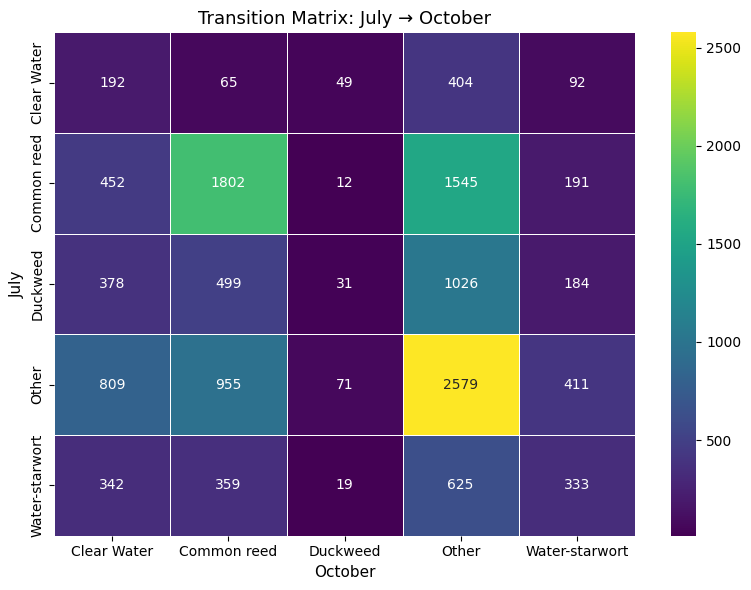

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os

# Load data
transition_matrix = pd.DataFrame({
    "Clear Water":         [192, 452, 378, 809, 342],
    "Common reed":         [65, 1802, 499, 955, 359],
    "Duckweed":            [49, 12, 31, 71, 19],
    "Other":               [404, 1545, 1026, 2579, 625],
    "Water-starwort":      [92, 191, 184, 411, 333]
}, index=["Clear Water", "Common reed", "Duckweed", "Other", "Water-starwort"])

# Create Sankey diagram
source_labels = list(transition_matrix.index)
target_labels = list(transition_matrix.columns)
labels = source_labels + target_labels

source_indices = []
target_indices = []
values = []

label_to_index = {label: idx for idx, label in enumerate(labels)}

for i, source in enumerate(source_labels):
    for j, target in enumerate(target_labels):
        value = transition_matrix.iloc[i, j]
        if value > 0:
            source_indices.append(label_to_index[source])
            target_indices.append(label_to_index[target])
            values.append(value)

fig_sankey = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="gray"
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color="lightblue"
    ))])

fig_sankey.update_layout(title_text="Vegetation Class Transitions: July to October", font_size=10)

# Display Sankey
fig_sankey.show()

# Create static transition matrix plot using matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, fmt="d", cmap="viridis", cbar=True,
            linewidths=0.5, linecolor="white", ax=ax)
ax.set_title("Transition Matrix: July → October", fontsize=13)
ax.set_xlabel("October", fontsize=11)
ax.set_ylabel("July", fontsize=11)
plt.tight_layout()

plt.show()


### merch all data

In [26]:
import pandas as pd

# Load predictions
df_march = pd.read_csv(r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_March\metadata_March.csv")      # e.g., metadata_March.csv
df_preds_march = pd.read_csv(r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_March\predictions_all_combined_rf_filtered.csv")  # e.g., predictions_march.csv
df_march = df_preds_march.merge(df_march, on="patch_filename")
df_march["season"] = "March"

# Repeat for July
df_july = pd.read_csv(r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\metadata_July.csv")
df_preds_july = pd.read_csv(r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_July\predictions_final_filtered.csv")
df_july = df_preds_july.merge(df_july, on="patch_filename")
df_july["season"] = "July"

# Repeat for October
df_oct = pd.read_csv(r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\metadata_October.csv")
df_preds_oct = pd.read_csv(r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\seasonal analysis\Data_October\predictions_all_updated.csv")
df_oct = df_preds_oct.merge(df_oct, on="patch_filename")
df_oct["season"] = "October"

# Combine all
df = pd.concat([df_march, df_july, df_oct], ignore_index=True)



In [28]:
df = df.drop(columns=["segment_y"]).rename(columns={"segment_x": "segment"})

### heatmap of class x seasonal abundance

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

out_dir = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Overleaf\Final_figures"

class_order = ["Clear Water", "Duckweed", "Common reed", "Water-starwort"]
segments_order = ["F1","F2","F3","F8","F9","F13","F15","F16","F17","F18","F19","F20","F21","F22","F23","F24"]

df = df[df["pred_label"].isin(class_order) & df["segment"].isin(segments_order)]

# Group and normalize
grouped = df.groupby(["season", "segment", "pred_label"]).size().reset_index(name="count")
grouped["total"] = grouped.groupby(["season", "segment"])["count"].transform("sum")
grouped["relative"] = grouped["count"] / grouped["total"] * 100

# Create a single figure with subplots for each season
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, season in enumerate(["March", "July", "October"]):
    season_df = grouped[grouped["season"] == season]
    pivot = season_df.pivot_table(index="pred_label", columns="segment", values="relative", fill_value=0)
    pivot = pivot.reindex(index=class_order, columns=segments_order)

    sns.heatmap(
        pivot, ax=axes[i], cmap="YlGnBu", linewidths=0.3, linecolor="gray",
        cbar=(i == 2),  # Show colorbar only on the last plot
        cbar_kws={'label': 'Relative Abundance (%)'} if i == 2 else None
    )
    axes[i].set_title(season, fontsize=14, pad=15)
    axes[i].set_xlabel("Segment", labelpad=10)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    if i == 0:
        axes[i].set_ylabel("Class")
    else:
        axes[i].set_ylabel("")

plt.tight_layout()
plt.savefig(os.path.join(out_dir, "relative_abundance_heatmap_combined.png"), dpi=600, bbox_inches="tight")
plt.close()


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

out_dir = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Overleaf\Final_figures"

class_order = ["Clear Water", "Duckweed", "Common reed", "Water-starwort"]
segments_order = ["F1","F2","F3","F8","F9","F13","F15","F16","F17","F18","F19","F20","F21","F22","F23","F24"]

df = df[df["pred_label"].isin(class_order) & df["segment"].isin(segments_order)]

# Group and normalize
grouped = df.groupby(["season", "segment", "pred_label"]).size().reset_index(name="count")
grouped["total"] = grouped.groupby(["season", "segment"])["count"].transform("sum")
grouped["relative"] = grouped["count"] / grouped["total"] * 100

# Create a single figure with subplots for each season
fig = plt.figure(figsize=(21, 5.5))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05], wspace=0.05)
axes = [fig.add_subplot(gs[i]) for i in range(3)]
cbar_ax = fig.add_subplot(gs[3])

for i, season in enumerate(["March", "July", "October"]):
    season_df = grouped[grouped["season"] == season]
    pivot = season_df.pivot_table(index="pred_label", columns="segment", values="relative", fill_value=0)
    pivot = pivot.reindex(index=class_order, columns=segments_order)

    sns.heatmap(
        pivot,
        ax=axes[i],
        cmap="viridis",
        linewidths=0.3,
        linecolor="gray",
        vmin=0,
        vmax=100,
        annot=True,
        fmt=".0f",
        annot_kws={"fontsize": 8},
        cbar=(i == 2),
        cbar_ax=cbar_ax if i == 2 else None,
        cbar_kws={'label': 'Relative Abundance (%)'} if i == 2 else None
    )

    axes[i].set_title(season, fontsize=14, pad=15)
    axes[i].set_xlabel("Segment", labelpad=10)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

    if i == 0:
        axes[i].set_ylabel("Class", labelpad=10, fontsize=12)
    else:
        axes[i].set_ylabel("")
        axes[i].tick_params(left=False)
        axes[i].set_yticklabels([])  # <-- remove y-axis labels for July & October

  

plt.tight_layout()
plt.savefig(os.path.join(out_dir, "relative_abundance_heatmap_combined.png"), dpi=600, bbox_inches="tight")
plt.close()


C:\Users\Sander\AppData\Local\Temp\ipykernel_11952\2101300168.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


## surface area per class

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# ─── CONFIG ────────────────────────────────────────────────────────────────────
out_dir = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Overleaf\Final_figures"

df["GSD"] = 0.007
df["area_m2"] = (df["patch_size"] ** 2) * (df["GSD"] ** 2)

class_order = ["Clear Water", "Duckweed", "Common reed", "Water-starwort"]
season_order = ["March", "July", "October"]
colors = {
    "Clear Water": "#1f77b4",
    "Duckweed": "#9ACD32",
    "Common reed": "#006400",
    "Water-starwort": "#228B22",
    "Other": "#4B2525"
}

# ─── AGGREGATE TOTAL SURFACE AREA PER CLASS PER SEASON ────────────────────────
df_filtered = df[df["pred_label"].isin(class_order)]
seasonal_surface = df_filtered.groupby(["season", "pred_label"])["area_m2"].sum().reset_index()
seasonal_surface["season"] = pd.Categorical(seasonal_surface["season"], categories=season_order, ordered=True)
seasonal_surface = seasonal_surface.sort_values("season")

# Total surface area per season (across all classes and segments)
total_area_per_season = df.groupby("season")["area_m2"].sum().reset_index()
total_area_per_season.columns = ["Season", "Total_Surface_Area_m2"]
print(total_area_per_season)

# ─── PLOT ──────────────────────────────────────────────────────────────────────
plt.figure(figsize=(9, 6))
ax = sns.lineplot(
    data=seasonal_surface,
    x="season", y="area_m2", hue="pred_label", marker="o",
    palette=colors, hue_order=class_order, linewidth=2, markersize=7
)

# Annotate with dynamic vertical offsets to avoid overlaps
custom_offsets = {
    ("Clear Water", "March"): 7,
    ("Clear Water", "July"): -12,
    ("Clear Water", "October"): 7,
    ("Duckweed", "March"): -12,
    ("Duckweed", "July"): 7,
    ("Duckweed", "October"): 7,
    ("Common reed", "March"): -3, 
    ("Common reed", "July"): 7,
    ("Common reed", "October"): 7,
    ("Water-starwort", "March"): 7,
    ("Water-starwort", "July"): 7,
    ("Water-starwort", "October"): 7,
}


for cls in class_order:
    class_data = seasonal_surface[seasonal_surface["pred_label"] == cls]
    for _, row in class_data.iterrows():
        season = row["season"]
        # Default offsets
        x_offset = 0
        if cls == "Common reed" and season == "March":
            x_offset = -15  # move text slightly to the left
        y_offset = custom_offsets.get((cls, season), 8)  # default offset = 8
        ax.annotate(
            f"{int(row['area_m2']):,}",
            (season, row["area_m2"]),
            textcoords="offset points", xytext=(x_offset, y_offset), ha='center',
            fontsize=8, color=colors[cls]
        )

# Axis labels and style
plt.xlabel("Season", fontsize=12, labelpad=10)
plt.ylabel("Total Surface Area (m²)", fontsize=12, labelpad=10)
plt.grid(True, linestyle=":", linewidth=0.5)
plt.legend(title="Class", loc="upper right", bbox_to_anchor=(1, 1), fontsize=10, title_fontsize=11, frameon=True)
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "surface_area_per_class_over_seasons_annotated.png"), dpi=600)
plt.close()


    Season  Total_Surface_Area_m2
0     July           74954.113024
1    March           78709.686272
2  October           78362.869760
